# 1. Reproducing Visualization

In [30]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# import the df
df = pd.read_csv('../data/makeovermonday/data/data_line_chart.csv')
df.tail()

,year,united_states,russia,iran,china,canada,afghanistan,albania,algeria,angola,...,ussr,ukraine,united_arab_emirates,united_kingdom,uzbekistan,venezuela,vietnam,world,yemen,yugoslavia
118,2018,30.273700,24.087809,8.096363,5.811079,6.363966,NaN,NaN,3.378375,NaN,...,NaN,0.708673,1.905122,1.463003,2.098265,1.138288,0.347747,138.809520,0.003608,NaN
119,2019,33.411996,24.444967,8.384403,6.362692,6.106570,NaN,NaN,3.130281,NaN,...,NaN,0.698451,2.023085,1.414473,2.068503,0.920744,0.354348,142.863523,0.003608,NaN
120,2020,32.979762,22.984079,8.983088,6.984332,5.962068,NaN,NaN,2.931286,NaN,...,NaN,0.688230,1.819829,1.424570,1.695642,0.776199,0.318218,138.981600,0.004690,NaN
121,2021,33.989108,25.276207,9.239405,7.531664,6.204554,NaN,NaN,3.639532,NaN,...,NaN,0.674602,2.100442,1.180273,1.833079,1.010128,0.259160,145.923131,0.004690,NaN
122,2022,35.227825,22.261254,9.338351,7.986291,6.660589,NaN,NaN,3.534300,NaN,...,NaN,0.630310,2.087866,1.373592,1.760252,1.050394,0.280699,145.577376,0.004690,NaN


In [32]:
# df['year'] = pd.to_datetime(df['year'], format='%Y') # change to date time format, might have to change to the middle of the year though

In [33]:
df_pivot  = df.melt(id_vars = ['year'],
                    var_name = 'country',
                    value_name = 'Production (EJ)')
df_pivot.head()

,year,country,Production (EJ)
0,1900,united_states,0.265826
1,1901,united_states,0.294581
2,1902,united_states,0.323337
3,1903,united_states,0.352092
4,1904,united_states,0.380848


In [34]:
df_pivot = df_pivot[df_pivot['country'].isin(['united_states', 'russia', 'iran', 'china', 'canada'])]
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             615 non-null    int64  
 1   country          615 non-null    object 
 2   Production (EJ)  530 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.2+ KB


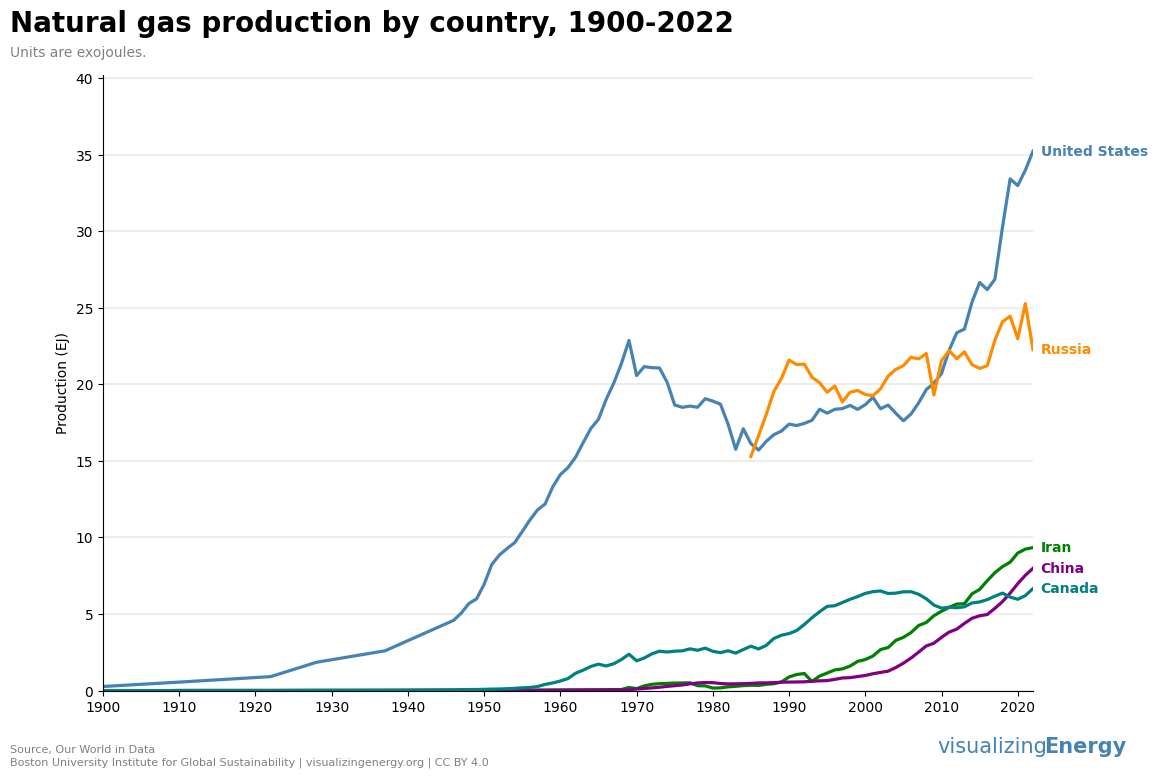

In [35]:
palette = {
    'united_states': 'steelblue',
    'russia': 'darkorange',
    'iran': 'green',
    'china': 'purple',
    'canada': 'teal'
}


plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df_pivot, x = 'year', y = 'Production (EJ)', hue = 'country', palette = palette, linewidth = 2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.2)  # Horizontal gridlines

# Add the first row of the title
plt.text(x = -0.1, y = 1.07, s = "Natural gas production by country, 1900-2022", fontsize = 20, ha = "left", weight = "bold", transform=plt.gca().transAxes)
# Add the second row of the title
plt.text(x = -0.1, y = 1.03, s = "Units are exojoules.", fontsize = 10, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add the first row of the Source
plt.text(x = -0.1, y = -0.1, s = "Source, Our World in Data", fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)
# Add the second row of the Source
plt.text(x = -0.1, y = -0.12, s = "Boston University Institute for Global Sustainability | visualizingenergy.org | CC BY 4.0", 
         fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add visualizingEnergy
plt.text(x = 1.015, y = -0.1, s = "visualizing", fontsize = 15, ha = "right", color = "steelblue", transform=plt.gca().transAxes)
plt.text(x = 1.1, y = -0.1, s = "Energy", fontsize = 15, ha = "right", color = "steelblue", weight = "bold",  transform=plt.gca().transAxes)

# Remove the legend
ax.get_legend().remove()

for country, color in palette.items():
    # Get the last value in the 'year' and 'Production (EJ)' for the specific country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    # Capitalize the first letter, replace underscores, and bold the text without LaTeX
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=color, va='center', fontweight='bold'
    )
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')
plt.show()

# 2. Suggest improvements and enhance visualization
1. Ensure the use of distinct colors - Changed Canada's color to red for better visibility comparing to neighbouring lines.  
2. Added Vertical gridlines for better Readability
3. Added major events and at turning points of graph  

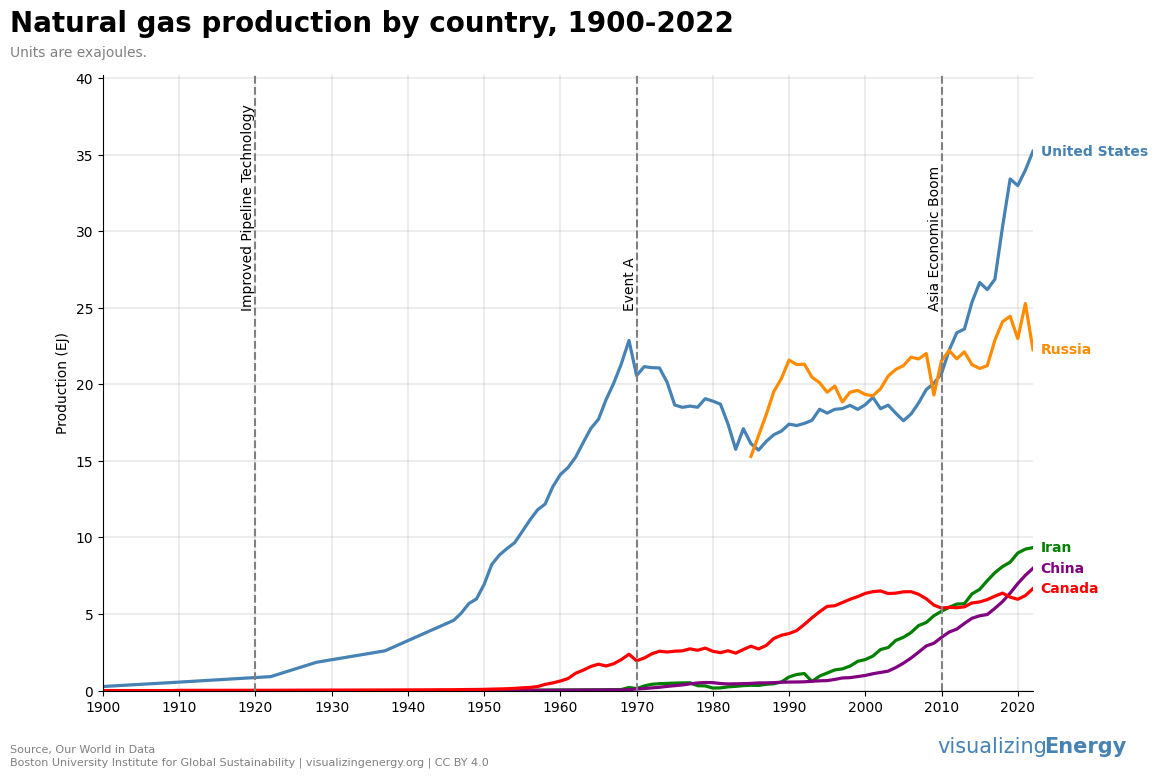

In [36]:
palette = {
    'united_states': 'steelblue',
    'russia': 'darkorange',
    'iran': 'green',
    'china': 'purple',
    'canada': 'red'
}

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df_pivot, x = 'year', y = 'Production (EJ)', hue = 'country', palette = palette, linewidth = 2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))

# Add "x" gridlines for better Readability
plt.grid(True, axis='both', color='grey', linestyle='-', linewidth=0.2)  # both gridlines

# Add the first and second row of the title
plt.text(x = -0.1, y = 1.07, s = "Natural gas production by country, 1900-2022", fontsize = 20, ha = "left", weight = "bold", transform=plt.gca().transAxes)
plt.text(x = -0.1, y = 1.03, s = "Units are exajoules.", fontsize = 10, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add the first second row of the Source
plt.text(x = -0.1, y = -0.1, s = "Source, Our World in Data", fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)
plt.text(x = -0.1, y = -0.12, s = "Boston University Institute for Global Sustainability | visualizingenergy.org | CC BY 4.0", 
         fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add visualizingEnergy
plt.text(x = 1.015, y = -0.1, s = "visualizing", fontsize = 15, ha = "right", color = "steelblue", transform=plt.gca().transAxes)
plt.text(x = 1.1, y = -0.1, s = "Energy", fontsize = 15, ha = "right", color = "steelblue", weight = "bold",  transform=plt.gca().transAxes)

# Remove the legend
ax.get_legend().remove()

for country, color in palette.items():
    # Get the last value in the 'year' and 'Production (EJ)' for the specific country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    # Capitalize the first letter, replace underscores, and bold the text without LaTeX
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=color, va='center', fontweight='bold'
    )

#Add vertical lines and annotations for key events
key_events = {
    1920 : 'Improved Pipeline Technology',
    1970 : 'Event A',
    2010 : 'Asia Economic Boom'
}

for date, event in key_events.items():
    plt.axvline(date, color = "gray", linestyle = '--')
    plt.text(x = date, y = 25, s = event, fontsize = 10, ha = "right", color = "Black", rotation = "vertical")
         
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')

# Showing the plot
plt.show()

# 3. Further Suggestion and Improvement

* Colourblind option 
* maybe use colour intensity instead of many different colour to make it colour blindness friendly (sns.diverging_palettes)
* Highlight key infromation or use annotation
* Use seaborn's colour palettes for easily distinguisable colour (also don't use more than 10 different country if we want to add more country)
* Use transparency 
* Make y-axis label and the country label slightly bigger

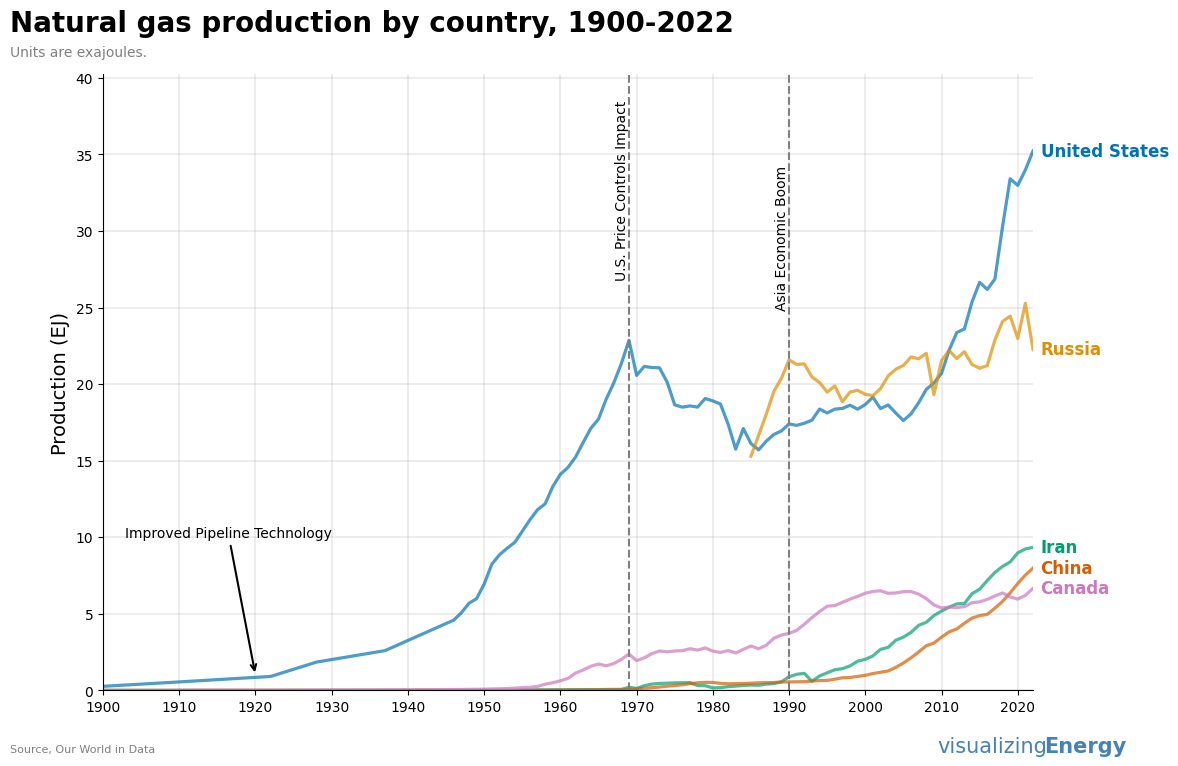

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the colorblind palette
colorblind_palette = sns.color_palette("colorblind", n_colors=len(df_pivot['country'].unique()))
sns.set_palette(colorblind_palette)

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df_pivot, x='year', y='Production (EJ)', hue='country', linewidth=2.3, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))

# Gridlines for readability
plt.grid(True, axis='both', color='grey', linestyle='-', linewidth=0.2)

# Titles and sources
plt.text(x=-0.1, y=1.07, s="Natural gas production by country, 1900-2022", fontsize=20, ha="left", weight="bold", transform=plt.gca().transAxes)
plt.text(x=-0.1, y=1.03, s="Units are exajoules.", fontsize=10, ha="left", color="gray", transform=plt.gca().transAxes)
plt.text(x=-0.1, y=-0.1, s="Source, Our World in Data", fontsize=8, ha="left", color="gray", transform=plt.gca().transAxes)
plt.text(x=1.015, y=-0.1, s="visualizing", fontsize=15, ha="right", color="steelblue", transform=plt.gca().transAxes)
plt.text(x=1.1, y=-0.1, s="Energy", fontsize=15, ha="right", color="steelblue", weight="bold", transform=plt.gca().transAxes)

# Set larger y-axis label
ax.set_ylabel('Production (EJ)', fontsize=14)

# Remove the legend
ax.get_legend().remove()

# Adding country labels on the right with colorblind-friendly colors
unique_countries = df_pivot['country'].unique()
for i, country in enumerate(unique_countries):
    # Get the last year and production value for each country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=colorblind_palette[i], va='center', fontweight='bold', fontsize=12
    )

price_control_year = 1969
plt.axvline(price_control_year, color="gray", linestyle='--')
plt.text(x=price_control_year, y=27, s="U.S. Price Controls Impact", fontsize=10, ha="right", color="black", rotation="vertical")

# Adding an arrow for "Improved Pipeline Technology"
ax.annotate(
    "Improved Pipeline Technology",
    xy=(1920, 1),  # Pointing to the blue line at around year 1920
    xytext=(1930, 10),  # Position of the text label
    fontsize=10,
    ha="right",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5)
)

# Adding the Asia Economic Boom line
plt.axvline(1990, color="gray", linestyle='--')
plt.text(x=1990, y=25, s="Asia Economic Boom", fontsize=10, ha="right", color="black", rotation="vertical")

# Set x and y limits
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')

# Show the plot
plt.show()


### Acknowledgement

We acknowledge the use of ChatGPT to debug code that was subsequently included in modified form in my report (public link to conversation, if available). We entered the following prompt(s) on November 9 2024: 
* What is the syntax for setting sns colourblind option